<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/Naive%20Bayes(CAC1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes

### Importing the libraries

In [170]:
import numpy as np
import pandas as pd
import sklearn


### Reading the dataset

In [171]:
dataset = pd.read_csv('/content/NASA_OrbitingBodies.csv')

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

dataset

,Id,Name,Estimated Diameter,Relative Velocity,Hazardous
0,2162635,162635 (2000 SS164),2.679415,13569.249220,False
1,2277475,277475 (2005 WK4),0.594347,73588.726660,True
2,2512244,512244 (2015 YE18),1.614507,114258.692100,False
3,3596030,(2012 BV13),0.215794,24764.303140,False
4,3667127,(2014 GE35),0.570217,42737.733760,True
...,...,...,...,...,...
90831,3763337,(2016 VX1),0.059435,52078.886690,False
90832,3837603,(2019 AD3),0.037501,46114.605070,False
90833,54017201,(2020 JP3),0.071456,7566.807732,False
90834,54115824,(2021 CN5),0.016370,69199.154480,False


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  90836 non-null  int64  
 1   Name                90836 non-null  object 
 2   Estimated Diameter  90836 non-null  float64
 3   Relative Velocity   90836 non-null  float64
 4   Hazardous           90836 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 2.9+ MB


####Printing x and y before encoding

In [172]:
print(x)

[[2.67941497e+00 1.35692492e+04]
 [5.94346868e-01 7.35887267e+04]
 [1.61450717e+00 1.14258692e+05]
 ...
 [7.14562100e-02 7.56680773e+03]
 [1.63696720e-02 6.91991545e+04]
 [8.91332990e-02 2.70244555e+04]]


In [173]:
print(y)

[False  True False ... False False False]


**Encoding character values**

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y= le.fit_transform(y)

####Printing x and y after encoding

In [175]:
print(x)

[[ 1486.  3421.]
 [ 1158. 76978.]
 [ 1379. 89203.]
 ...
 [  630.   735.]
 [  261. 73736.]
 [  689. 20055.]]


In [176]:
print(y)

[0 1 0 ... 0 0 0]


### Splitting the dataset into the Training set and Test set 

In [177]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0) 

###Feature Scaling

In [178]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [179]:
x_train

array([[-2.31140704, -0.90863812],
       [-0.45877478,  0.29316646],
       [-0.52329431, -0.91893473],
       ...,
       [-0.62160979,  0.52541212],
       [ 0.34311083,  0.27718765],
       [ 0.14340752, -0.33687141]])

###Train Gaussian Naive Bayes classifier 


In [180]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB()

####Predict output for the test set and compare with the existing Y value

In [181]:
y_pred = classifier.predict(x_test)
print (y_pred)
print (y_test)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


###Accuracy Score

In [182]:
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test,y_pred)
print (ac)

0.873399141315915


###Confusion matrix / ROC

In [183]:
from sklearn.metrics import confusion_matrix  

cm=confusion_matrix(y_test,y_pred)
print (cm)

[[23219  1375]
 [ 2075   582]]


###Visualization

####Training Data

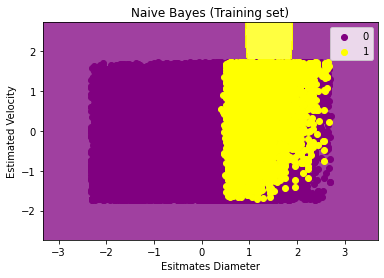

In [184]:
import matplotlib.pyplot as mtp 
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('purple', 'yellow')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],color = ListedColormap(('purple', 'yellow'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Esitmates Diameter')  
mtp.ylabel('Estimated Velocity')  
mtp.legend()  
mtp.show() 

####Test Data

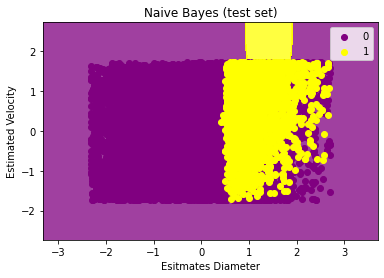

In [185]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'yellow')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                color = ListedColormap(('purple', 'yellow'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('Esitmates Diameter')  
mtp.ylabel('Estimated Velocity')  
mtp.legend()  
mtp.show() 

##Conclusion

###DataSet
To demonstrate Naive Bayes Classifier I have used a dataset from NASA which lists out few Earth orbiting bodies with their name,esitimated diameters and velocities. The size of the data set is 90836x5. Based on diameter and velocities of bodies, we predict if they is Hazardous to Earth or Not.


###Encoding
Since the Last column (i.e. Hazardous) is boolean in nature that's why we need to encode it to convert it into numeric.


###Inference
After Spliting, Scaling and Training we can see that the accuracy in results is 87.33% and Confusion matrix is [[23219  1375]
 [ 2075   582]] which shows that 1375+2075=3450 values out of 90836 were wrongly predicted.


###Graph
The yellow dots in both the Scatter plots represent all the hazardous orbiting bodies while the purple dots represent all the safe (non-hazardous) ones.